<h1 align="center">Surface Hydrology</h1>
<h2 align="center">GEO2010 Spring 2017</h2>
<h3 align = "center" > Exercise 4 </h3>

#### Date: 2017/02/22
Author: Bikas Chandra Bhattarai, University of Oslo

**Ojectives:**

    To introduce different methods to estimate missing rainfall over a station.
    To calculate evaporation by different methods.

### Background

Some precipitation stations may have short breaks in the records because of absence of the observer or because of instrumental failures. It is often necessary to estimate this missing record. The missing precipitation of a station is estimated from the observations of precipitation at some other stations as close to and as evenly spaced around the station with the missing record as possible. The station whose data is missing is called interpolation station and gauging stations whose data are used to calculate the missing station data are called index stations.

**There are two methods for estimation of missing data.**

Arithmetic Mean Method

Normal Ratio Method

**Normal ratio method: **

### $R_A = \frac{1}{3}\left [ \frac{M_A}{M_X}R_X + \frac{M_A}{M_Y}R_Y+\frac{M_A}{M_Z}R_Z \right ]$

where,  $R_X , R_Y,  R_Z,$ are the annual rainfall of station X,Y, Z during the time of missing rainfall at station 'A'.  $M_A, M_X, M_Y and M_Z$ are the annual average rainfall at respective station A, X, Y and Z.


**Station average method (Arithmetic average method):**

$R_A = \frac{1}{n}\sum_{i=1}^{n}R_i$


Spatial interpolation of rainfall can be done by Inverse distance weighting (IDW) method. Detail equation is given in your text book(equation 4.20, Dingman, page 167).


**Inverse-distance weighting method**

$R_A = \frac{\sum W_i R_i}{\sum W_i}$

where i = { X, Y, Z...}

$W = \frac{1}{d^2}$

where d is the distance between the station with known and unknown precipitation.


**Training exercise: 1**

Estimate  the missing rainfall by station average method and Normal-ratio method at the station A from the data given in table below:

|Station|A|X|Y|Z|
|---|---|----|---|----|
|Annual rainfall in 2000 (mm)|?|126|162|155|
|Annual average rainfall (mm)|1550|1690|1420|1477|

In [1]:
% matplotlib inline
from openpyxl import load_workbook
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Annual rainfall in 2000 [mm]
R_X = 126.
R_Y = 162.
R_Z = 155.

n = 3  # Number of stations

# Annual avarage rainfall [mm]
M_A = 1550
M_X = 1690
M_Y = 1420
M_Z = 1477

In [3]:
# Station average method:
R_A1 = round((R_X+R_Y+R_Z)/n)
R_A1

148

In [4]:
# Normal-ratio method:
R_A2 = round((M_A/n)*(R_X/M_X + R_Y/M_Y + R_Z/M_Z))
R_A2

152

**Training exercise: 4.2**

The annual average rainfall of four stations X, Y, Z and T in a drainage basin is 1523, 1425, 1362, 1722 mm respectively. In a particular year, station T does not function and the rainfall figure of X, Y, Z was 1630, 1421 and 1200 mm respectively. If the distance from station T to X, Y and Z are 10, 20, 17 km respectively then compute the missing rainfall at station T by station average and  Normal ratio method. Give some general comments on your finding.

In [5]:
# Annual avarage rainfall [mm]:
M_X = 1523.
M_Y = 1425.
M_Z = 1362.
M_T = 1722.

n = 3  # Number of stations

# Annual rainfall a particualar year [mm]:
R_X = 1630.
R_Y = 1421.
R_Z = 1200.

# Distance from station T [km]:
X = 10.
Y = 20.
Z = 17.

In [6]:
# Average method:
R_T = (R_X + R_Y + R_Z)/n
R_T

1417.0

In [7]:
# Normal-ratio method:
R_T = round((M_T/n)*(R_X/M_X + R_Y/M_Y + R_Z/M_Z))
R_T

1692

**4.3 With reference to question 4.2, interpolate rainfall at station T by IDW method.**

In [8]:
# Inverse-distance weighting method:
W_X = 1/(X**2)
W_Y = 1/(Y**2)
W_Z = 1/(Z**2)

R_T = round((W_X*R_X + W_Y*R_Y + W_Z*R_Z)/(W_X + W_Y + W_Z))
R_T

1504

The rainfall at station T could be 1417, 1504 or 1692 mm depending on what method we use.

**4.4 Linacre (1977) has derived a simple formula for estimating evaporation rates in various climates using mean monthly temperature in celsius (T), site elevation in meter (h), latitude in degree (L) and mean dew point temp in celsius (Td).**

## $E = \frac{\frac{700 (T +0.006 \times h)}{100 -L} + 15 (T-Td)}{(80-T)}$

Calculate the monthly evaporation rate for the station A by using the provided data.[Latitude = 28.20 degree, Elevation = 806 m asl]

In [9]:
data = pd.read_table('station_A.csv',sep = ',',index_col= 0,  parse_dates=True)

In [10]:
mon_data = data.resample('m').mean()
Td = mon_data['d2m'] - 273.15
T = mon_data['t2m'] - 273.15
L = 28.20
h = 806

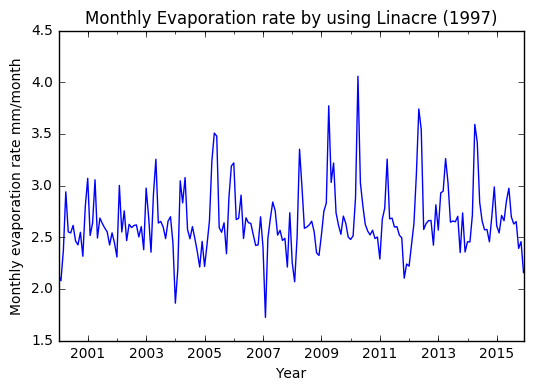

In [11]:
Ev_mon = ((700*(T+0.006*h)/(100-28.20))+15*(T-Td))/(80+T)
Ev_mon.plot()
plt.ylabel('Monthly evaporation rate mm/month')
plt.xlabel('Year')
plt.title('Monthly Evaporation rate by using Linacre (1997)')
plt.show()

## Obligatory exercise 4


Use equation 1.21, pp22 in Dingman $(μ_{ET}= μ_P- μ_Q)$ and  estimated the evapotranspiration for the following stations. Make a single Plot (bar plot) for calculated evaporation, precipitation and discharge. [Dats is given in file 'elvdata.xlsx']

*[Hint: Start by calculating the specific discharge (mm/year), by dividing by the catchment area. The specific discharge has the unit mm/year in stead of m3/year, and is useful when we want to compare the discharge from catchments with different areas.]*

|Station|connecticut River, USA| Yukon River, Canada| Eupharates River, Iraq|Sæternbekken, Bærum, Norway
|--|-------------------------------|-------|------|---|
|catchment Area (km2) |20370|932400|261100|6.23|
|Precipitation (mm/year) |1100|570|300|900|
|Discharge (m3/s)|386|5100|911|0.11|

In [12]:

# Importing data from the excel file
wb = load_workbook(filename = 'elvdata.xlsx')
sheet_names = wb.get_sheet_names()
ws = wb.get_sheet_by_name(sheet_names[0])
# Converting the data into lists
rivers = [cell.value for row in ws.iter_rows('B1:E1') for cell in row]
A = [float(cell.value) for row in ws.iter_rows('B2:E2') for cell in row]
# [km2]
p = [float(cell.value) for row in ws.iter_rows('B3:E3') for cell in row]
# [mm/year]
Q = [float(cell.value) for row in ws.iter_rows('B4:E4') for cell in row]
#[m3/s]

/usr/local/lib/python3.5/dist-packages/openpyxl/worksheet/worksheet.py:495: UserWarning: Using a range string is deprecated. Use ws[range_string]
  warn("Using a range string is deprecated. Use ws[range_string]")


In [13]:
# Converting list into numerical data
A = np.array(A)
p = np.array(p)
Q = np.array(Q)

In [17]:
# Converting the units
A = A*1e6
q = Q/A
q = q*1e3*60*60*24*365
# [m2]
# [m/s]
# [mm/year]
ET = p-q
# evapotranspiration [mm/year]
ET = np.around(np.divide(ET,100))*100

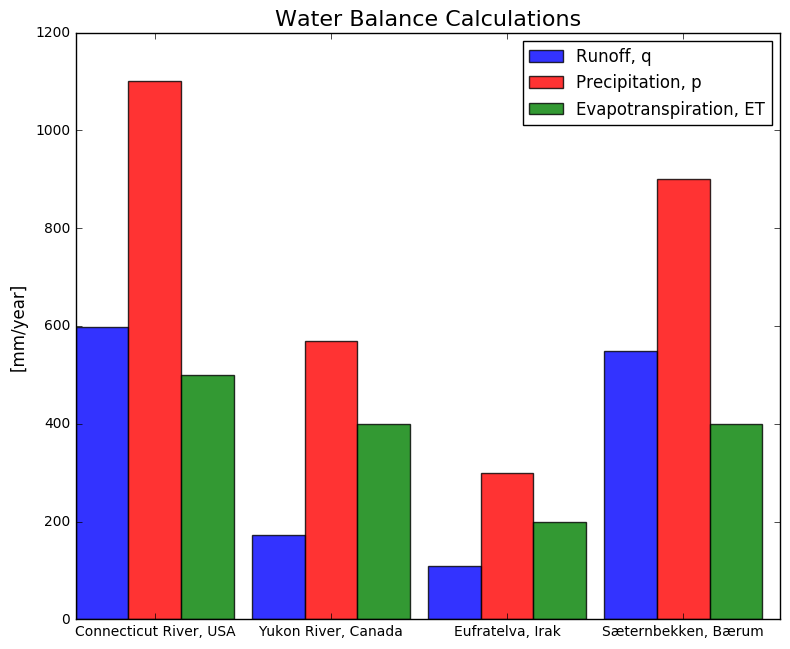

In [15]:
## Making plot

# Fixing the figure size
matplotlib.rcParams['figure.figsize'] = (8.0,6.6)
n_groups = 4
# Rounding the numbers
q = np.around(q)
p = np.around(p)
ET = np.around(ET)
fig, ax = plt.subplots()
# making a plot with subplots
index = np.arange(n_groups)
bar_width = 0.3
# setting the width
# Plotting the different subplots
rects1 = plt.bar(index, q, bar_width, alpha = 0.8, color = 'b', label = 'Runoff, q')
rects2 = plt.bar(index+bar_width, p, bar_width, alpha = 0.8, color = 'r',label = 'Precipitation, p')
rects3 = plt.bar(index+2*bar_width, ET, bar_width, alpha = 0.8, color ='g', label = 'Evapotranspiration, ET')
# Giving names and size to title, legends and axis
plt.ylabel('[mm/year]',fontsize = 12)
# y axis
plt.title('Water Balance Calculations',fontsize = 16)
# title
plt.xticks(index+1.5*bar_width, (rivers[0],rivers[1],rivers[2],rivers[3]))
# x axis
plt.legend()
# legends
plt.tight_layout()
plt.show()